#투빅스 15기 장아연 : [1] EDA

#Data 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

font_path = r'/content/NanumBarunGothicBold.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')



data_df=pd.read_csv("과제데이터.csv",encoding="UTF8",parse_dates=["datetime"])



In [2]:
print("Data Shape: ", data_df.shape)

Data Shape:  (10886, 12)


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
data_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1




# 범주형 자료<br>









## ```holiday```, ```workingday```, ```weather```

In [5]:
print('holiday : {}'.format(data_df['holiday'].unique()))
print('workingday : {}'.format(data_df['workingday'].unique()))
print('weather : {}'.format(data_df['weather'].unique()))

holiday : [0 1]
workingday : [0 1]
weather : [1 2 3 4]




##  ```year```, ```month```, ```hour```,```daysofweek```<br> 




*   ```datetime```을 이용해 ```year```, ```month```, ```hour```,```daysofweek```변수 생성<br>-> ```day```와 ```minute```, ```second```는 사용 x<br><br>  *```day``` : 19일까지 자료뿐이라 일별 분석으로 사용하기 어려움<br> * ```minute```, ```second```: 모두 0으로 기록되어 있어 유의미한 분석 어려움<br> *```daysofweek```: 0 ~ 6 : 순차적으로 월요일~일요일 <br>




In [6]:
data_df["year"] = data_df["datetime"].dt.year
data_df["month"] = data_df["datetime"].dt.month
data_df["day"] = data_df["datetime"].dt.day
data_df["hour"] = data_df["datetime"].dt.hour
data_df["minute"] = data_df["datetime"].dt.minute
data_df["second"] = data_df["datetime"].dt.second
data_df["daysofweek"]=data_df["datetime"].dt.dayofweek

print('year : {}'.format(data_df['year'].unique()))
print('month : {}'.format(data_df['month'].unique()))
print('day : {}'.format(data_df['day'].unique()))
print('hour : {}'.format(data_df['hour'].unique()))
print('minute : {}'.format(data_df['minute'].unique()))
print('second : {}'.format(data_df['second'].unique()))
print('daysofweek : {}'.format(data_df['daysofweek'].unique()))

year : [2011 2012]
month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
day : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
hour : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
minute : [0]
second : [0]
daysofweek : [5 6 0 1 2 3 4]


In [7]:
data_df.drop(['day', 'minute','second'], axis='columns', inplace=True)

##  ```weekend```<br> 

 
 

*    ```workingday```와 ```holiday```이용해서 ```weekend```변수 새롭게 생성<br> ```workingday```=0 & ```holiday```=0인 day를 표현하는 변수 필요함<br>-> ```weekend ``` 변수로 정의







In [8]:
data_day=data_df[["workingday","holiday"]]
data_day.head(10)

,workingday,holiday
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [9]:
data_df.loc[(data_df['workingday']==0)&(data_df['holiday']==0),'weekend']=1
data_df['weekend'] = data_df['weekend'].fillna(0)
data_df["weekend"].unique()

array([1., 0.])

In [45]:
data_day=data_df[["workingday","holiday","weekend"]]
data_day.head(10)

,workingday,holiday,weekend
0,0,0,1.0
1,0,0,1.0
2,0,0,1.0
3,0,0,1.0
4,0,0,1.0
5,0,0,1.0
6,0,0,1.0
7,0,0,1.0
8,0,0,1.0
9,0,0,1.0


##```season``` , ```quarter``` <br>
```season``` -> ```quater```<br> : `1` : 1 ~ 3월,  `2` : 4 ~ 6월, `3` : 7 ~ 9월, `4` :10 ~ 12월임으로 <br>```season```보다는 ```quarter```로 표현하는 것이 적합

In [11]:
print('season : {}'.format(data_df['season'].unique()))
data_df.rename(columns={'season':'quarter'}, inplace=True)

season : [1 2 3 4]


```season``` : <br> ```1``` :
Spring : 3 ~ 5월, ```2``` : 
Summer : 6 ~ 8월, ```3``` :
Fall : 9 ~ 11월, ```4``` :
Winter : 12 ~ 2월

In [12]:
data_df['season'] = data_df['month'].apply(lambda x: 1 if 3<=x<=5  else(2 if 6<=x<=8 else(3 if 9<=x<=11 else 4)))


In [47]:
data_period=data_df[["season","quarter"]]
data_period.head(10)

,season,quarter
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1
5,4,1
6,4,1
7,4,1
8,4,1
9,4,1


##범주형 자료 정리 및 설명
Categorical|Variable|Explanation
:-|:-|:-
 ```year ```|2|  ```2011 ```, ```2012 ```
  ```month```|12|  ```1 ```, ```2```,```3```,```4```,```5```, ```6```,```7```,```8```,```9```, ```10```,```11```,```12```
    ```hour```|24|  ```0```,```1 ```, ```2```,```3```,```4```,```5```, ```6```,```7```,```8```,```9```, ```10```,```11```,```12```,```13 ```, ```14```,```15```,```16```,```17```, ```18```,```19```,```20```,```21```, ```22```,```23```
      ```daysofweek```|7|  ```0```=월,```1```=화, ```2```=수,```3```=목,```4```=급,```5```=토, ```6```=일
```quarter ```|4|  ```1 ``` = 1분기,  ```2 ``` = 2분기,  ```3 ``` = 3분기,  ```4 ``` = 4분기
 ```season ```|4|  ```1 ``` = spring,  ```2 ``` = summer,  ```3 ``` = fall,  ```4 ``` = winter
 ```weather ```|4|  ```1 ```: Clear, Few clouds, Partly cloudy, Partly cloudy<br> ```2 ```: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> ```3 ```: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> ```4 ```: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 ```holiday ```|2|  ```1 ``` : holiday  ```0 ``` : not holiday 
 ```workingday ```|2|  ```1 ``` : not weekend and not holiday   ```0 ``` : weekend or holiday
 ```weekend ```|2|  ```1 ``` : weekend  ```0 ``` : not weekend 






#**Target Variable = ```total```**



#수치형 자료 



```count```는 ```casual```와  ```registered```의 합이라는 뜻에 더욱 적합하게 ```total```로 변수명 변경

: ```temp```, ```atemp```, ```humidity```, ```windspeed```, ```casual```, ```registered```, ```total``` <br>

In [15]:
data_df.rename(columns={'count':'total'}, inplace=True)
num_data=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total']

##수치형 자료 정리 및 설명

Continuous Variable|Explanation
:-|:-
temp| temperature in Celsius
atemp| "feels like" temperature in Celsius
humidity|  relative humidity
windspeed|  wind speed
casual| number of non-registered user rentals initiated
registered| number of registered user rentals initiated
total| number of total rentals



##이상치 처리 전 수치형 변수 분포

Text(0.5, 0.98, '이상치 처리 전 수치형 변수 분포 히스토그램')

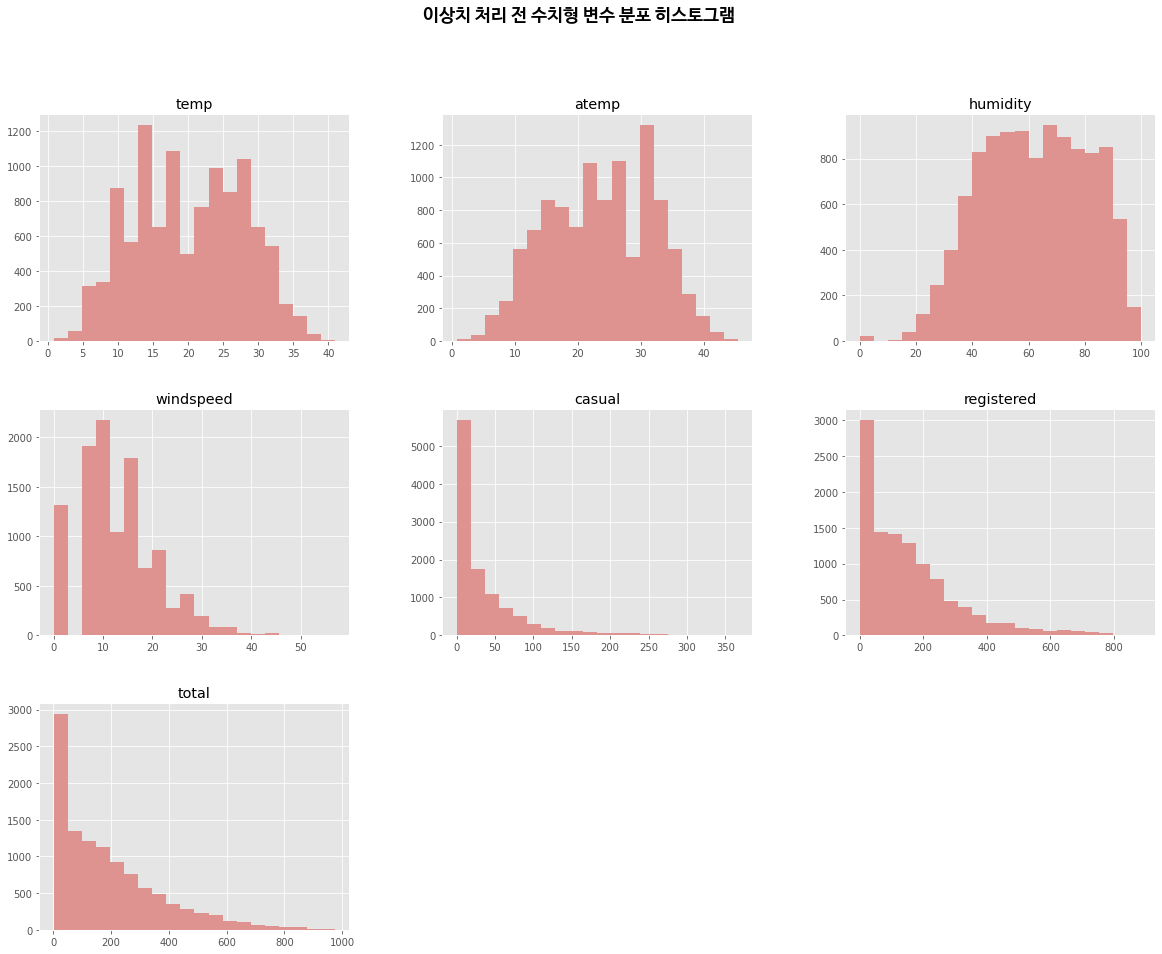

In [16]:
data_df[num_data].hist(bins=20, figsize=(20,15),color="#DE9391")
plt.suptitle("이상치 처리 전 수치형 변수 분포 히스토그램", fontsize=60,fontproperties=fontprop)

In [17]:
data_df[num_data].describe()

,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##이상치 처리: ```windspeed```


```windspeed``` : 연속적인 수치형 변수이지만 0에서 두드러진 불연속적인 분포 보임 -> 이상치 의심


In [18]:
print(data_df['windspeed'].value_counts())

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64


 전체 10886개의  ```windspeed``` 값 중 결측치 의심값 ```0```은 1313개<br> => 전체 ```windspeed``` 값 중 약 12.1%에 해당<br>
 => ```windspeed``` 는  ```weather```와 관련된 변수로 ```weather```의  ```1```,```2```,```3```,```4```별 ```windspeed```의 평균으로 대체





In [19]:

data_df.loc[(data_df['weather']==1)&(data_df['windspeed']==0),'windspeed']=data_df[(data_df['weather']==1)&(data_df['windspeed']!=0)]["windspeed"].mean()
data_df.loc[(data_df['weather']==2)&(data_df['windspeed']==0),'windspeed']=data_df[(data_df['weather']==2)&(data_df['windspeed']!=0)]["windspeed"].mean()
data_df.loc[(data_df['weather']==3)&(data_df['windspeed']==0),'windspeed']=data_df[(data_df['weather']==3)&(data_df['windspeed']!=0)]["windspeed"].mean()
data_df.loc[(data_df['weather']==4)&(data_df['windspeed']==0),'windspeed']=data_df[(data_df['weather']==4)&(data_df['windspeed']!=0)]["windspeed"].mean()



```windspeed```의 이상치 의심 값이 ```weather```별 평균으로 변경됨 확인

In [20]:
print(data_df["windspeed"].value_counts())

8.998100     1120
11.001400    1057
12.998000    1042
7.001500     1034
15.001300     961
14.739018     901
6.003200      872
16.997900     824
19.001200     676
19.999500     492
22.002800     372
13.829267     338
23.999400     274
26.002700     235
27.999300     187
30.002600     111
31.000900      89
32.997500      80
15.397710      74
35.000800      58
39.000700      27
36.997400      22
43.000600      12
40.997300      11
43.998900       8
46.002200       3
56.996900       2
47.998800       2
50.002100       1
51.998700       1
Name: windspeed, dtype: int64


In [21]:
data_df[num_data].corr()

,temp,atemp,humidity,windspeed,casual,registered,total
temp,1.000000,0.984948,-0.064949,-0.036054,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.064818,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.306228,-0.348187,-0.265458,-0.317371
windspeed,-0.036054,-0.064818,-0.306228,1.000000,0.080590,0.069289,0.080000
casual,0.467097,0.462067,-0.348187,0.080590,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.069289,0.497250,1.000000,0.970948
total,0.394454,0.389784,-0.317371,0.080000,0.690414,0.970948,1.000000


##log transformation : ```casual```,```register```,```total```

세 변수 모두 ```매우 높은 std값```을 가짐<br>->각 변수의 최소값과 25% 사분위 값의 간극과 최대값과 75% 사분위 값의 차이가 큼<br>->featurescale 진행한 ```data_df_scal```데이터셋으로 변수간의 분포 확인함

In [22]:
data_cnt_scal=data_df
data_cnt_scal = data_df[np.abs(data_df["total"] - data_df["total"].mean()) <= (3*data_df["total"].std())]
data_cnt_scal = data_df[np.abs(data_df["casual"] - data_df["casual"].mean()) <= (3*data_df["casual"].std())]
data_cnt_scal = data_df[np.abs(data_df["registered"] - data_df["registered"].mean()) <= (3*data_df["registered"].std())]

print(data_df.shape)
print(data_cnt_scal.shape)


(10886, 18)
(10651, 18)


`total`,`registered`,`casual` 변수는 한쪽으로 치우져 있음<br>
-> outlier data를 제거하고 로그 처리하여 변경하여 normal한 형태로 변형

((array([-3.80179375, -3.57615011, -3.4522475 , ...,  3.4522475 ,
          3.57615011,  3.80179375]),
  array([-0.45651567, -0.45651567, -0.45651567, ...,  1.06080275,
          1.06177843,  1.0635341 ])),
 (0.13389496135515833, 0.9134132204584565, 0.8277900071067924))

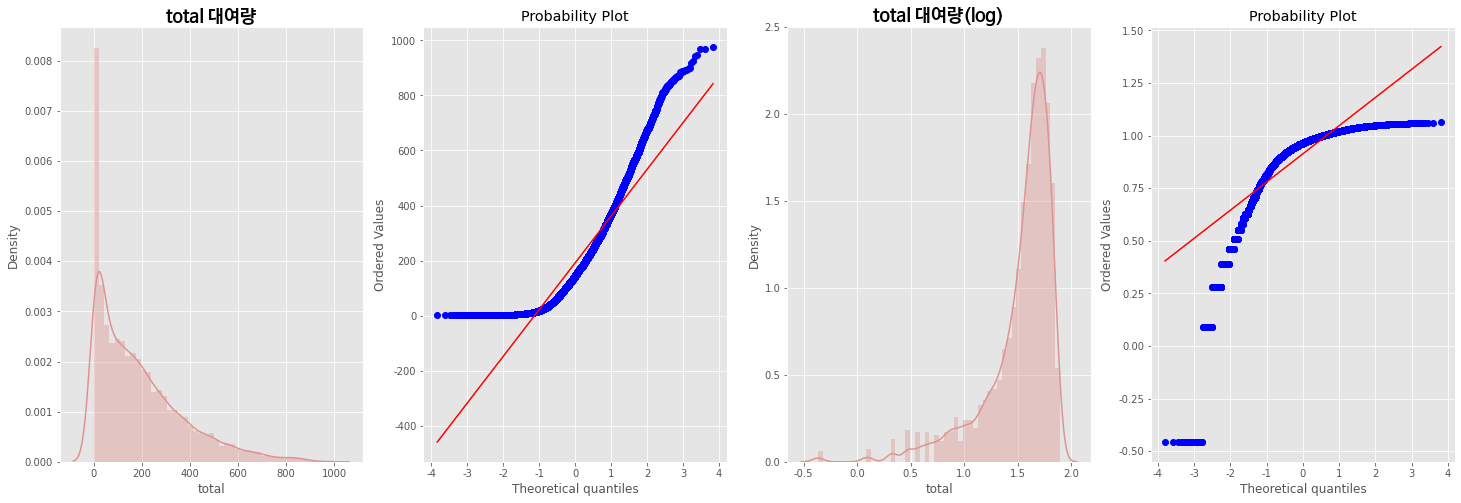

In [48]:

# total값의 데이터 분포도를 파악

fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(25,8)


fig1=sns.distplot(data_df["total"], ax=ax1,color="#DE9391")
fig1.set_title("total 대여량",fontsize=60,fontproperties=fontprop)
fig2=stats.probplot(data_df["total"], dist='norm', fit=True, plot=ax2)


data_cnt_scal["total"]=np.log(data_cnt_scal["total"])

fig3=sns.distplot(data_cnt_scal["total"], ax=ax3,color="#DE9391")
fig3.set_title("total 대여량(log)",fontsize=60,fontproperties=fontprop)
stats.probplot(np.log1p(data_cnt_scal["total"]), dist='norm', fit=True, plot=ax4)

((array([-3.80217846, -3.57655633, -3.45266653, ...,  3.45266653,
          3.57655633,  3.80217846]),
  array([0.        , 0.        , 0.        , ..., 1.92990822, 1.93030969,
         1.93229819])),
 (0.44823633759028475, 1.2463334322881787, 0.9376297213922061))

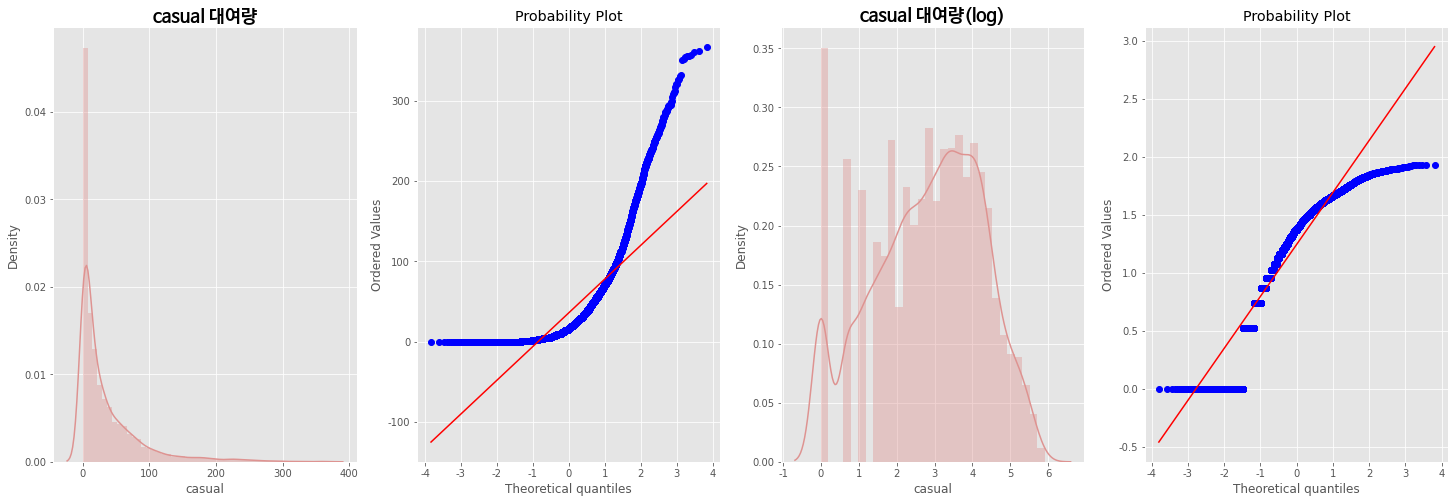

In [24]:

# casual값의 데이터 분포도를 파악

fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(25,8)


fig1=sns.distplot(data_df["casual"], ax=ax1,color="#DE9391")
fig1.set_title("casual 대여량",fontsize=60,fontproperties=fontprop)
fig2=stats.probplot(data_df["casual"], dist='norm', fit=True, plot=ax2)


data_cnt_scal=data_cnt_scal[data_cnt_scal["casual"]>0] #`casual` 변수의 na, -inf 등의 결측값 제거
data_cnt_scal["casual"]=np.log(data_cnt_scal["casual"])
fig3=sns.distplot(data_cnt_scal["casual"], ax=ax3,color="#DE9391")
fig3.set_title("casual 대여량(log)",fontsize=60,fontproperties=fontprop)
stats.probplot(np.log1p(data_cnt_scal["casual"]), dist='norm', fit=True, plot=ax4)


((array([-3.80179375, -3.57615011, -3.4522475 , ...,  3.4522475 ,
          3.57615011,  3.80179375]),
  array([0.        , 0.        , 0.        , ..., 2.0021863 , 2.00285404,
         2.00285404])),
 (0.2522160274838446, 1.6817504114385475, 0.8869370476378642))

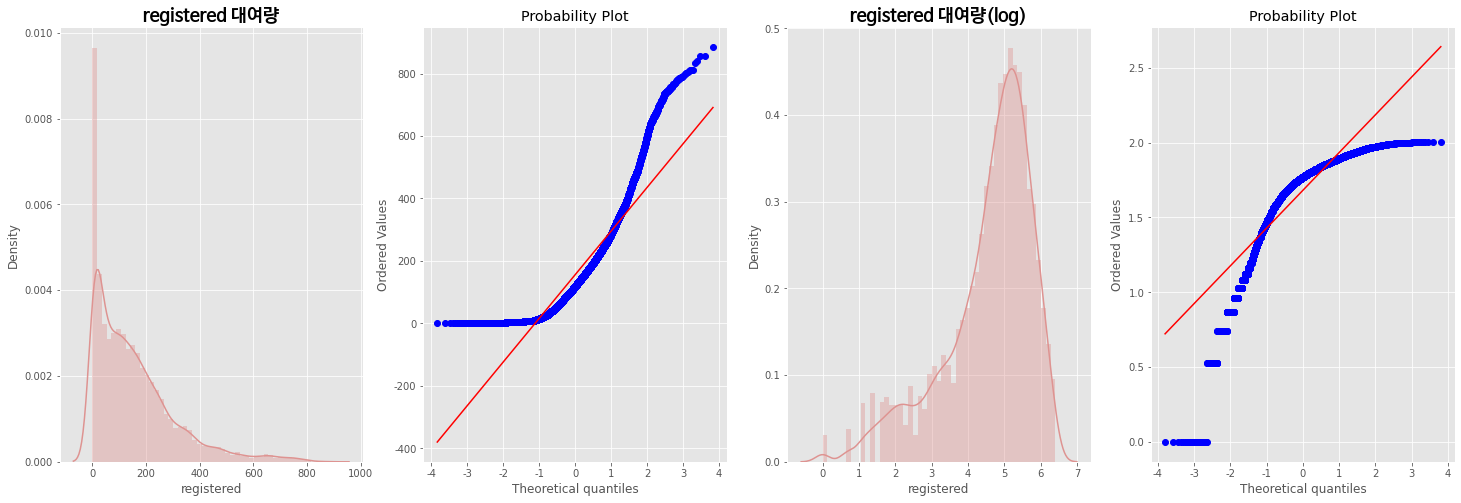

In [25]:

# registered값의 데이터 분포도를 파악

fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(25,8)


fig1=sns.distplot(data_df["registered"], ax=ax1,color="#DE9391")
fig1.set_title("registered 대여량",fontsize=60,fontproperties=fontprop)
fig2=stats.probplot(data_df["registered"], dist='norm', fit=True, plot=ax2)


data_cnt_scal=data_cnt_scal[data_cnt_scal["registered"]>0] #`registered` 변수의 na, -inf 등의 결측값 제거
data_cnt_scal["registered"]=np.log(data_cnt_scal["registered"])

fig3=sns.distplot(data_cnt_scal["registered"], ax=ax3,color="#DE9391")
fig3.set_title("registered 대여량(log)",fontsize=60,fontproperties=fontprop)
stats.probplot(np.log1p(data_cnt_scal["registered"]), dist='norm', fit=True, plot=ax4)

##이상치 처리 후 수치형 변수 분포




Text(0.5, 0.98, '이상치 처리 후 수치형 변수 분포 히스토그램')

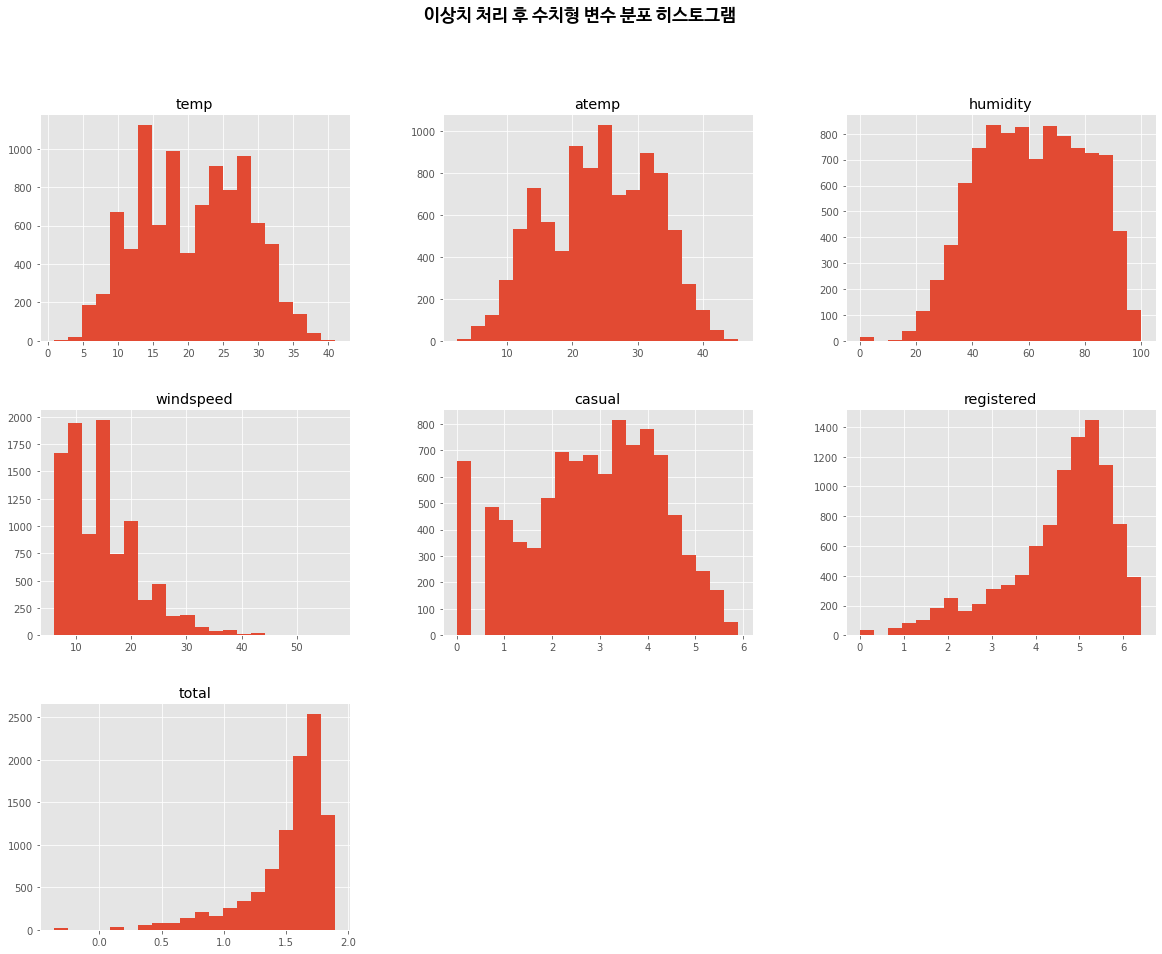

In [49]:
data_cnt_scal[num_data].hist(bins=20, figsize=(20,15))
plt.suptitle("이상치 처리 후 수치형 변수 분포 히스토그램", fontsize=60,fontproperties=fontprop)

In [28]:
data_cnt_scal[num_data].describe()

,temp,atemp,humidity,windspeed,casual,registered,total
count,9650.000000,9650.000000,9650.000000,9650.000000,9650.000000,9650.000000,9650.000000
mean,20.760106,24.236463,61.258756,14.613349,2.827415,4.557952,4.782319
std,7.564243,8.214838,19.196695,6.674424,1.431140,1.228745,1.202566
min,0.820000,2.275000,0.000000,6.003200,0.000000,0.000000,0.693147
25%,14.760000,17.425000,46.000000,8.998100,1.791759,4.007333,4.158883
50%,21.320000,25.000000,61.000000,14.739018,2.995732,4.875197,5.084500
75%,27.060000,31.060000,77.000000,16.997900,3.951244,5.420535,5.662960
max,41.000000,45.455000,100.000000,56.996900,5.905362,6.410175,6.663133


#수치형 변수 관계

In [29]:
data_cnt_scal[num_data].corr()

,temp,atemp,humidity,windspeed,casual,registered,total
temp,1.000000,0.984582,-0.056852,-0.040493,0.527589,0.240612,0.300418
atemp,0.984582,1.000000,-0.036080,-0.067234,0.525414,0.235188,0.295277
humidity,-0.056852,-0.036080,1.000000,-0.311385,-0.368749,-0.319471,-0.343231
windspeed,-0.040493,-0.067234,-0.311385,1.000000,0.095353,0.105454,0.108748
casual,0.527589,0.525414,-0.368749,0.095353,1.000000,0.724821,0.806195
registered,0.240612,0.235188,-0.319471,0.105454,0.724821,1.000000,0.989330
total,0.300418,0.295277,-0.343231,0.108748,0.806195,0.989330,1.000000


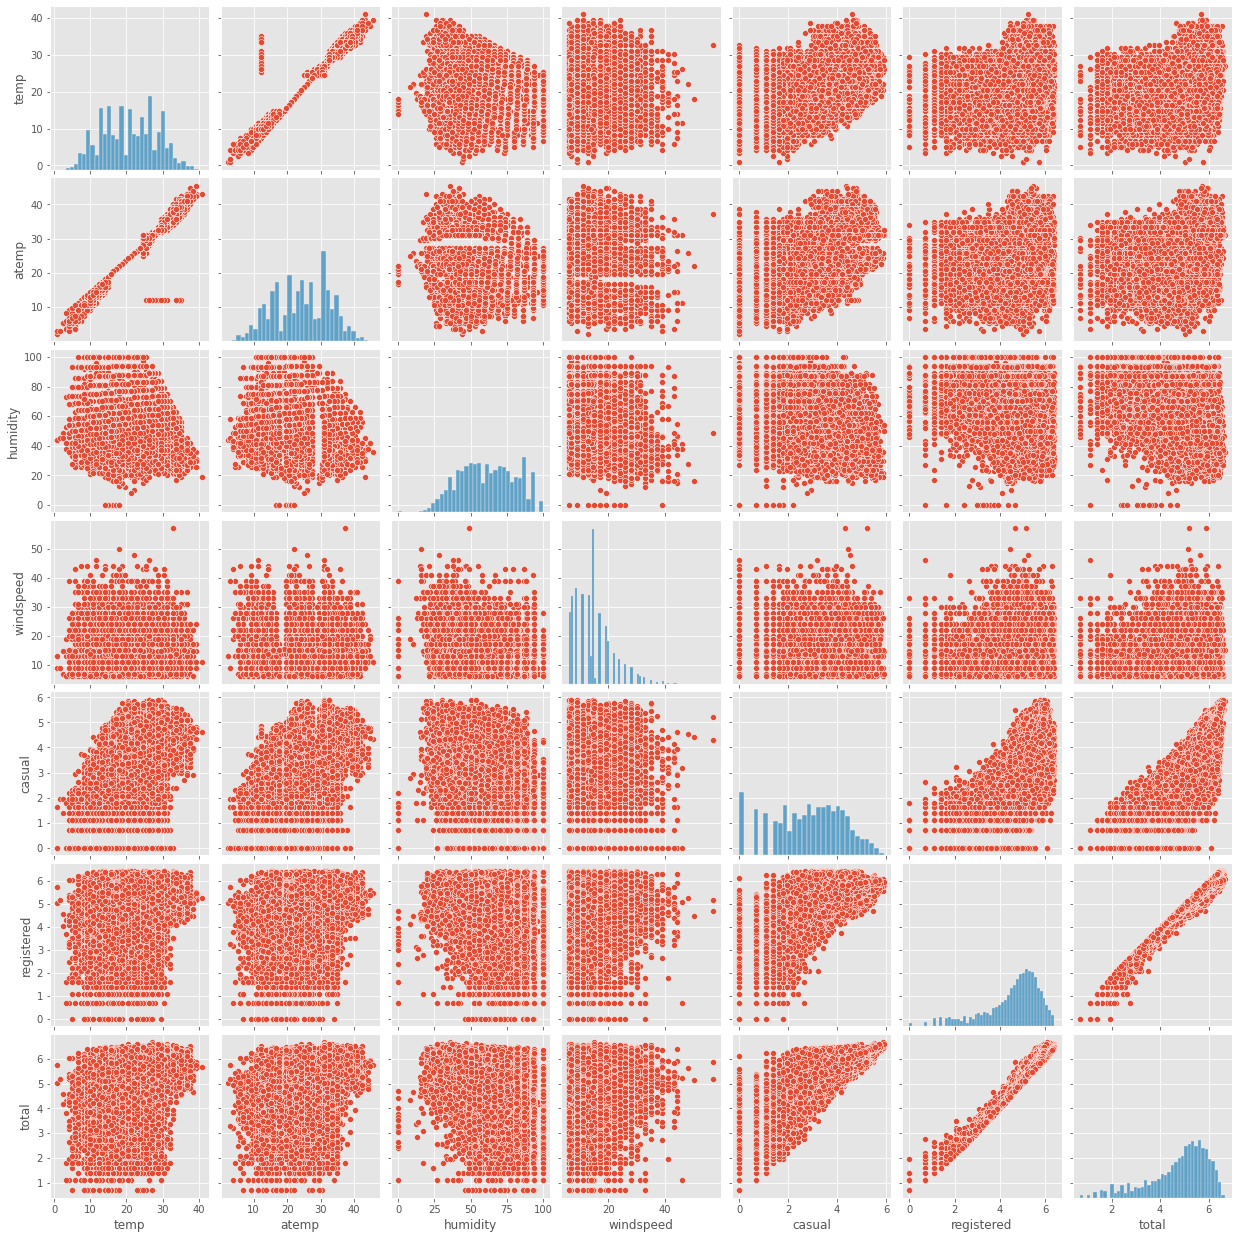

In [30]:
sns.pairplot(data_cnt_scal[num_data])

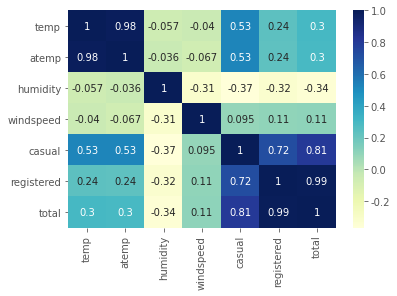

In [31]:
sns.heatmap(data_cnt_scal[num_data].corr(),cmap='YlGnBu', annot=True)
plt.show()

*`atemp` 와 `temp` 의 강한 상관관계는 분석시 다중공선성 문제 일으킴<br> ->Ridge Estimator 등의 방법으로 후에 해결 필요<br>
*`casual`과 `registered`는 누설변수임으로 고려 x

# ```Datetime```에 따른 대여량 분석

##**년도별 대여량**<br>



> ```year``` : **```2012``` >> ```2011``` <br>**
2011년동안 자전거 대여 서비스 홍보가 효과적이고 사람들의 입소문을 탓다고 짐작 가능



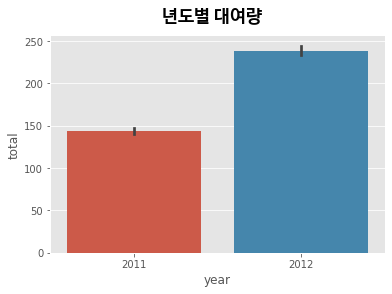

In [32]:
sns.barplot(data=data_df, x="year", y="total")
plt.suptitle("년도별 대여량", fontsize=60,fontproperties=fontprop)
plt.show()

##**월별 대여량**<br>




>```month``` : ```6월``` > ```7월``` = ```8월``` = ```9월```>...<br>
```temp``` : ```7월``` > ```8월``` > ```6월``` > ```9월```>... <br>
```atemp``` : ```7월``` > ```8월``` > ```6월``` > ```9월```>.. <br>
```humidity``` : ```4월```< ...<```7월```<```6월```< ```11월```<```8월```< ```5월```<...<```9월```<br><br>
=> 기온이 높으면서 상대적으로 습도가 낮은 ```6월```, ```7월```,```8월```, ```5월```에 월별 자전거 대여량이 많음







Text(0.5, 1.0, '월별 평균 습도')

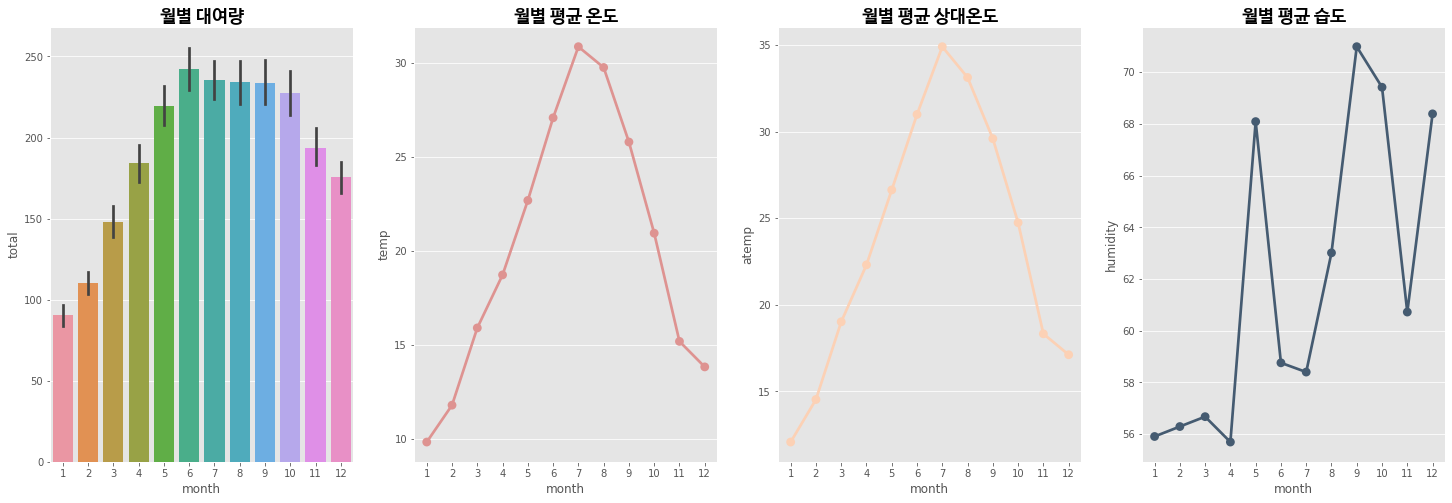

In [50]:
month_average={"temp":"mean","atemp":"mean","humidity":"mean"}
month_info=data_df.groupby("month",as_index=False).agg(month_average)


fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(25,8)


fig1=sns.barplot(data=data_df, x="month", y="total",ax=ax1)
fig1.set_title("월별 대여량",fontsize=60,fontproperties=fontprop)
fig2=sns.pointplot(data=month_info, x="month", y="temp",color="#DE9391",ax=ax2)
fig2.set_title("월별 평균 온도",fontsize=60,fontproperties=fontprop)
fig3=sns.pointplot(data=month_info, x="month", y="atemp",color="#FCD1B5",ax=ax3)
fig3.set_title("월별 평균 상대온도",fontsize=60,fontproperties=fontprop)
fig4=sns.pointplot(data=month_info, x="month", y="humidity",color="#455B71",ax=ax4)
fig4.set_title("월별 평균 습도",fontsize=60,fontproperties=fontprop)

##**시간대별 대여량**<br>



> ```hour``` : ```17시``` > ```18시``` > ```8시``` > ```16시 = 19시``` <br>
전체적으로 출퇴근 시간과 같이 교통량이 많아 도로가 혼잡한 경우 대여량이 많음<br>
->```workingday```,```holiday``` ,```weekend```  여부에 따라 자전거 대여량을  ```hour```분포를 세부적으로 살펴봐야할 필요성있음<br> (*해당 결과 : https://colab.research.google.com/drive/1qS8lu27sVxfAKB3704ybW2lFXdUPPbzq#scrollTo=MG37SrwfbARo*)







Text(0.5, 1.0, '시간대별 이용자수')

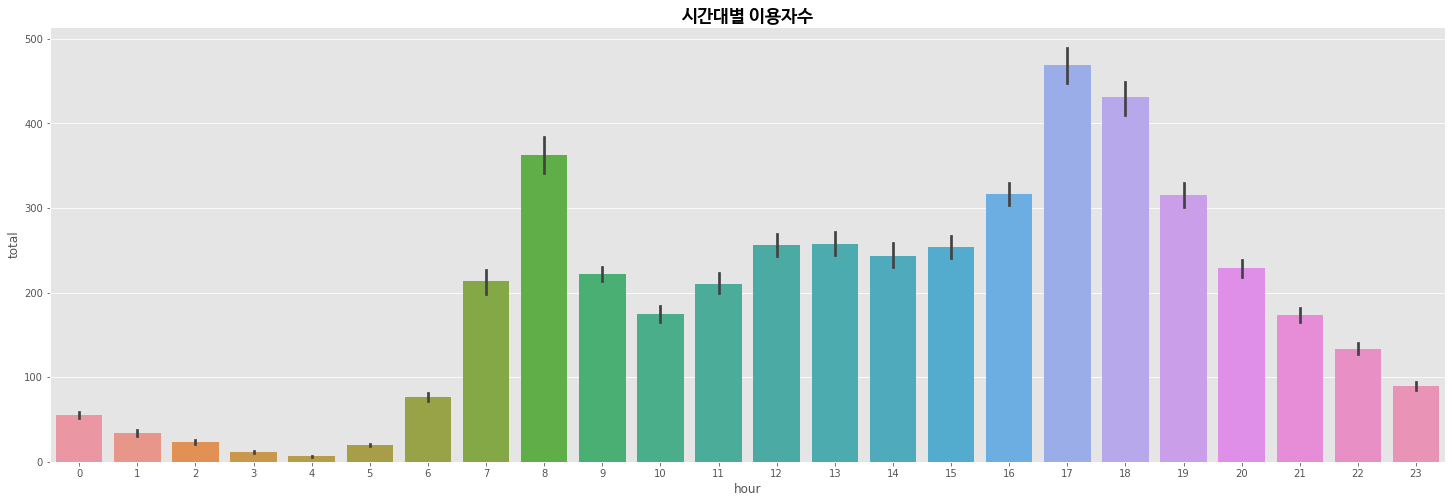

In [34]:
fig,(ax1)= plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(25,8)

fig1=sns.barplot(data=data_df, x="hour", y="total",ax=ax1)
fig1.set_title("시간대별 대여량",fontsize=60,fontproperties=fontprop)


##**요일별 대여량**<br>



> ```daysofweek``` : 요일별 차이 두드러지 지지는 않지만 ```5```, ```6```에 대여량 많음<br>





5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: daysofweek, dtype: int64

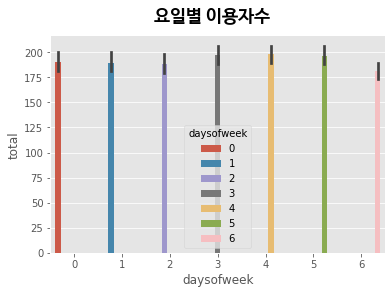

In [35]:
sns.barplot(x="daysofweek", y="total", hue="daysofweek", data=data_df)
plt.suptitle("요일별 대여량",fontsize=60,fontproperties=fontprop)
data_df["daysofweek"].value_counts()



#**분기별 대여량**<br>



> ```quarter``` : ```3분기``` > ```2분기``` > ```4분기``` > ```1분기``` <br>






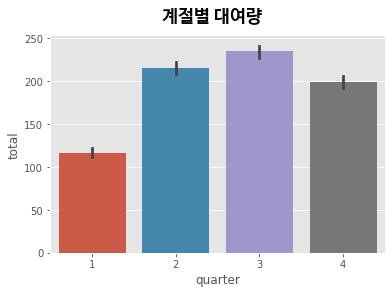

In [36]:
sns.barplot(data=data_df, x="quarter", y="total")
plt.suptitle("계절별 대여량",fontsize=60,fontproperties=fontprop)
plt.show()

#**계절별 대여량**<br>



> ```season``` : ```여름``` > ```가을``` > ```봄``` > ```겨울``` <br>

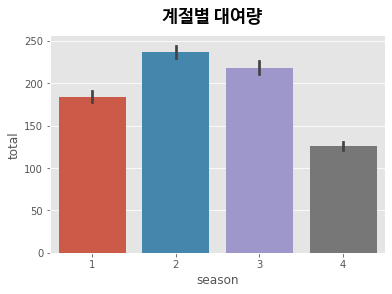

In [37]:
sns.barplot(data=data_df, x="season", y="total")
plt.suptitle("계절별 대여량",fontsize=60,fontproperties=fontprop)
plt.show()

#**날씨별 대여량**<br>



> ```weather``` : ```Clear``` > ```Mist+Cloudy``` > ```Heavy Snow``` > ```Light Snow``` <br>
날씨가 맑고 안개나 구름이 적어 자전거를 타는데 시야확보가 잘될수록 대여량 많음




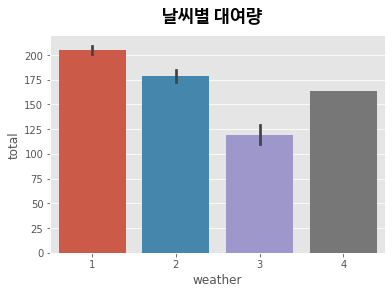

In [38]:
sns.barplot(data=data_df, x="weather", y="total")
plt.suptitle("날씨별 대여량",fontsize=60,fontproperties=fontprop)
plt.show()

#**Day별 대여량**<br>






##```holiday```,```weekend```,```workingday``` 여부와 대여량

Text(0.5, 1.0, '평일 여부에 따른 이용자수')

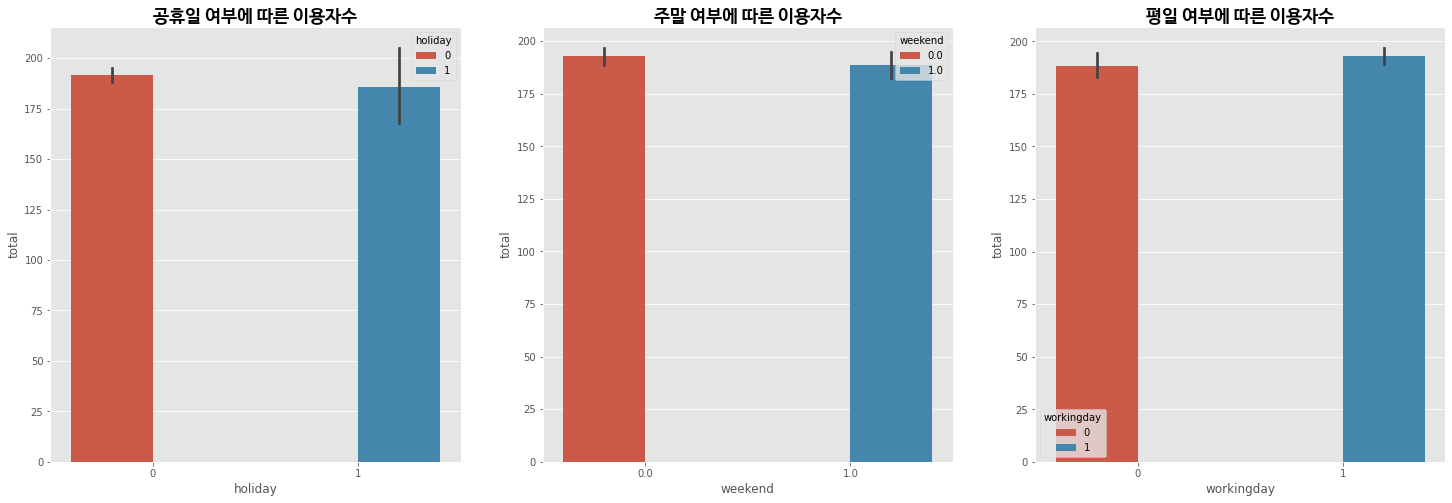

In [39]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25,8)

fig1=sns.barplot(x="holiday", y="total", hue="holiday", data=data_df,ax=ax1)
fig1.set_title("공휴일 여부에 따른 대여량",fontsize=60,fontproperties=fontprop)



fig2=sns.barplot(x="weekend", y="total", hue="weekend", data=data_df,ax=ax2)
fig2.set_title("주말 여부에 따른 대여량",fontsize=60,fontproperties=fontprop)

fig3=sns.barplot(x="workingday", y="total", hue="workingday", data=data_df,ax=ax3)
fig3.set_title("평일 여부에 따른 대여량",fontsize=60,fontproperties=fontprop)




###**```holiday``` 대여량과 ```hour```**



> *   
```holiday```인 날의 경우 : <br>10시 ~ 15시-> 점심 시간 & 낮 시간에 대여량이 높음<br><br>
*   ```holiday```이 아닌 날의 경우 :<br>
7시 ~ 9시 & 17시 ~ 19시 -> 오전 아침과 저녁 시간에 대여량 높음









###**```weekend``` 대여량과  ```hour```**



> *   ```weekend```인 날의 경우 : <br>11시 ~ 14시-> 점심 시간 & 낮 시간에 대여량 높음<br><br>
*   ```weekend```이 아닌 날의 경우 :<br>
7시 ~ 9시 & 17시 ~ 19시 -> 오전 아침과 저녁 시간에 대여량 높음




###**```workingday``` 대여량과 ```hour```**



> *   ```workingday```인 날의 경우 : <br>7시 ~ 9시 & 17시 ~ 18시 ->출퇴근 시간에 대여량 높음
*   ```workingday```이 아닌 날의 경우 :<br>
11시 ~ 15시 -> 점심 시간대에 대여량 높음




Text(0.5, 1.0, '평일 여부에 따른 시간대별 자전거 이용자수')

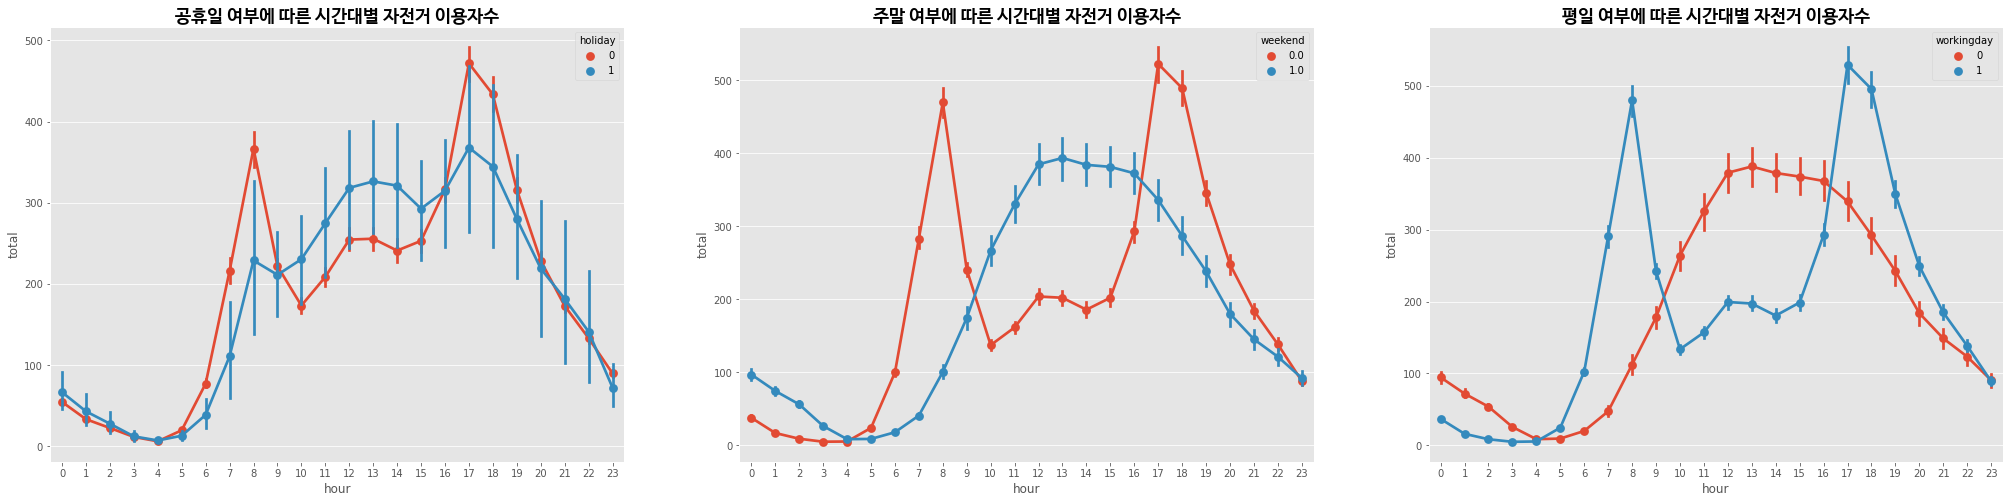

In [40]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(35,8)


fig2=sns.pointplot( x="hour", y="total", hue="holiday",data=data_df,ax=ax1)
fig2.set_title("공휴일 여부에 따른 시간대별 자전거 대여량", fontsize=60,fontproperties=fontprop)

fig2=sns.pointplot( x="hour", y="total", hue="weekend",data=data_df,ax=ax2)
fig2.set_title("주말 여부에 따른 시간대별 자전거 대여량", fontsize=60,fontproperties=fontprop)

fig2=sns.pointplot( x="hour", y="total", hue="workingday",data=data_df,ax=ax3)
fig2.set_title("평일 여부에 따른 시간대별 자전거 대여량", fontsize=60,fontproperties=fontprop)



###정리

> ```holiday```와```weekend```같이 쉬는 날의 경우``` 점심 시간```과 ```낮 시간```에 자전거 대여량이 많은 반면<br> ```workingday```와 같이  출근과 등교 등을 하는 경우 ```오전 아침 시간```과 ```저녁 시간```에 대여량 많음







#온도에 따른 자전거 대여량<br>
대체로 20도 ~ 30도의 온화한 기온일 때 자전거 대여량이 많음 

Text(0.5, 1.0, '온도별 자전거 회원 이용자 수')

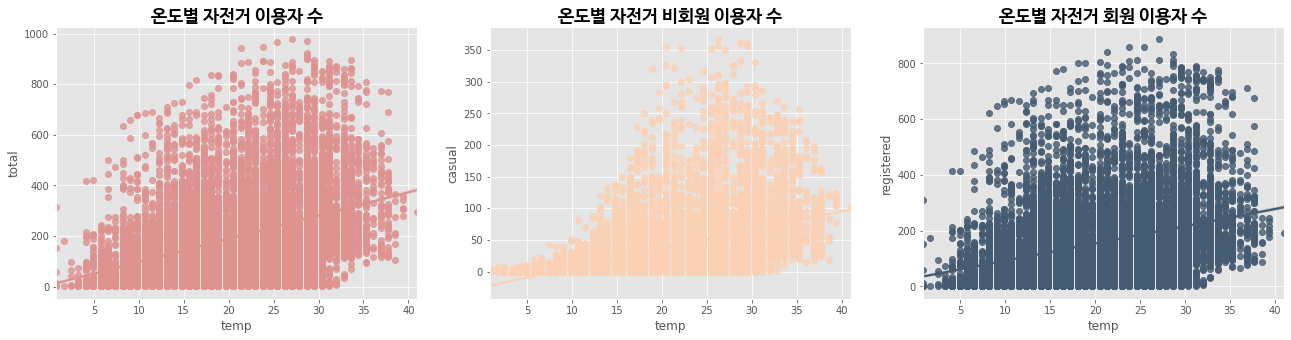

In [41]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(22, 5)

fig1=sns.regplot(x="temp", y="total",data=data_df,color="#DE9391",ax=ax1)
fig1.set_title("온도별 자전거 대여량", fontsize=80,fontproperties=fontprop)

fig2=sns.regplot( x="temp", y="casual",data=data_df,color="#FCD1B5",ax=ax2)
fig2.set_title("온도별 자전거 비회원 대여량", fontsize=80,fontproperties=fontprop)

fig3=sns.regplot(x="temp", y="registered",data=data_df,color="#455B71",ax=ax3)
fig3.set_title("온도별 자전거 회원 대여량", fontsize=80,fontproperties=fontprop)

#습도에 따른 자전거 대여량<br> 
대체로 30 내외의 습도일 때 자전거 대여량이 많음

Text(0.5, 1.0, '습도에 따른 자전거 회원 이용자 수')

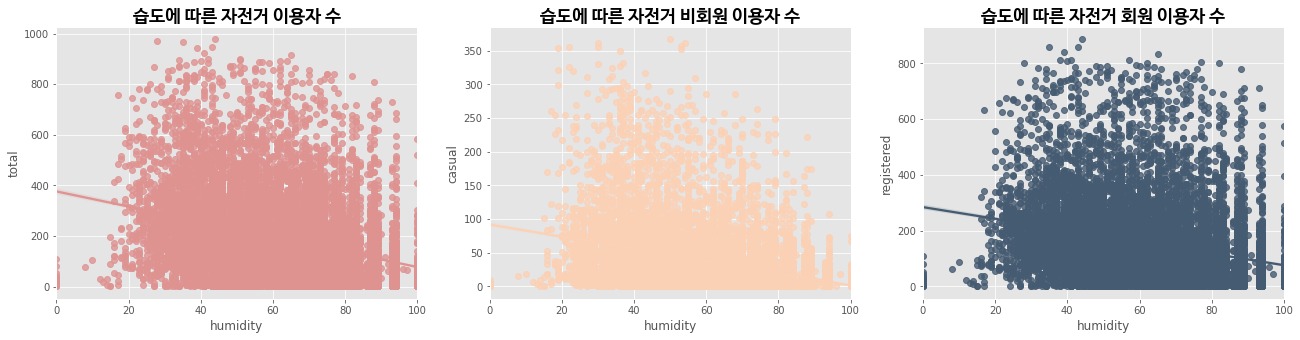

In [42]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(22, 5)

fig1=sns.regplot(x="humidity", y="total",data=data_df,color="#DE9391",ax=ax1)
fig1.set_title("습도에 따른 자전거 대여량", fontsize=80,fontproperties=fontprop)

fig2=sns.regplot( x="humidity", y="casual",data=data_df,color="#FCD1B5",ax=ax2)
fig2.set_title("습도에 따른 자전거 비회원 대여량", fontsize=80,fontproperties=fontprop)

fig3=sns.regplot(x="humidity", y="registered",data=data_df,color="#455B71",ax=ax3)
fig3.set_title("습도에 따른 자전거 회원 대여량", fontsize=80,fontproperties=fontprop)

#풍속에 따른 자전거 대여량<br>
대체로 15 내외의 약한 풍속일 때 자전거 대여량이 많음

Text(0.5, 1.0, '풍속에 따른 자전거 회원 이용자 수')

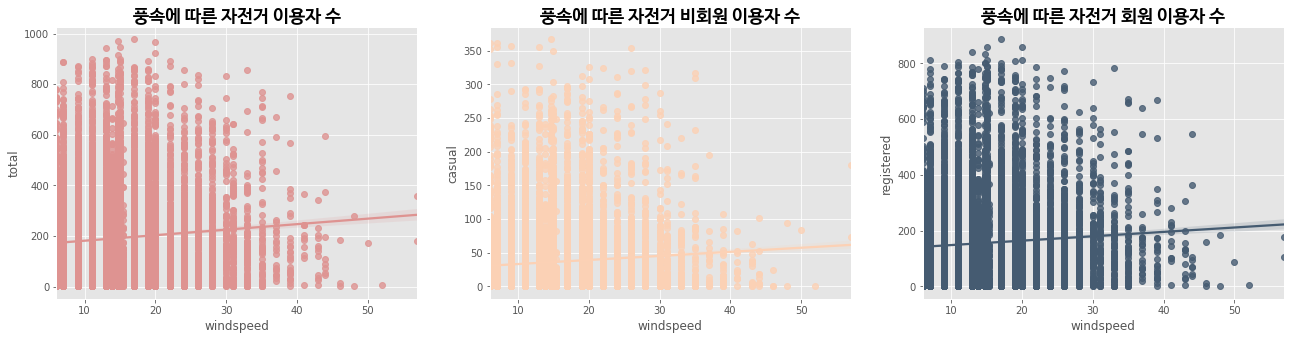

In [43]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(22, 5)

fig1=sns.regplot(x="windspeed", y="total",data=data_df,color="#DE9391",ax=ax1)
fig1.set_title("풍속에 따른 자전거 대여량", fontsize=80,fontproperties=fontprop)

fig2=sns.regplot( x="windspeed", y="casual",data=data_df,color="#FCD1B5",ax=ax2)
fig2.set_title("풍속에 따른 자전거 비회원 대여량", fontsize=80,fontproperties=fontprop)

fig3=sns.regplot(x="windspeed", y="registered",data=data_df,color="#455B71",ax=ax3)
fig3.set_title("풍속에 따른 자전거 회원 대여량", fontsize=80,fontproperties=fontprop)

#전체 대여량과 회원 / 비회원 대여량 관계<br>
자전거 대여량과 자전거 회원 대여량이 자전거 대여량과 자전거 비회원 대여량보다 더 높은 선형관계(+)를 띄는 것을 보아 회원들이 자전거 대여량에 큰 기여를 하고 있음 

Text(0.5, 1.0, '자전거 회원 대여량')

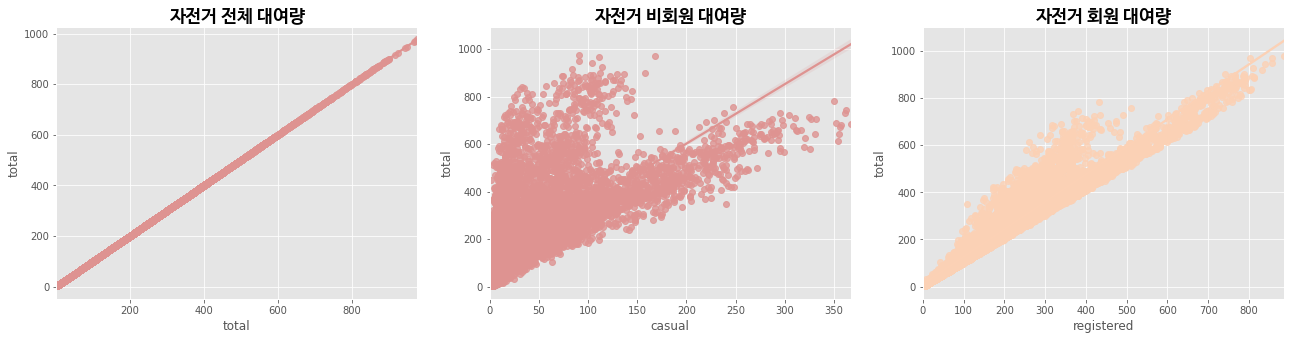

In [51]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(22, 5)

fig1=sns.regplot(x="total", y="total",data=data_df,color="#DE9391",ax=ax1)
fig1.set_title("자전거 전체 대여량", fontsize=80,fontproperties=fontprop)

fig1=sns.regplot(x="casual", y="total",data=data_df,color="#DE9391",ax=ax2)
fig1.set_title("자전거 비회원 대여량", fontsize=80,fontproperties=fontprop)

fig2=sns.regplot( x="registered", y="total",data=data_df,color="#FCD1B5",ax=ax3)
fig2.set_title("자전거 회원 대여량", fontsize=80,fontproperties=fontprop)



#Summary<br>


1.   Feature Engineering

*   ```data_cnt_scal[total]```
*   ```data_cnt_scal[casual]```
*   ```data_cnt_scal[registered]```<br>
:정규본포 근사 위해 log transformation 진행
<br><br>
*   ```windspeed```<br>
:0값의 불연속적인 분포가 두드러져 이상치라 판단. 동일한 ```weather```별 이상치가 아닌   ```windspeed```의 평균으로 대체
<br><br>
*   ```datetime```
*   ```year```
*   ```month```
*   ```hour```
*   ```daysofweek```<br>
: 기존의  ```datetime```에 포함된 년, 월, 날, 시간, 날짜를 각각 분리해 ```year```,```month```,  ```hour```, ```daysofweek``` 생성
<br><br>
*   ```season```
*   ```quarter```<br>
:기존의 ```season```은 계절보다는 통념적인 4분기에 따라 12달을 나눈 것에 가까워 이를 ```quarter```값으로 재정의<br>
:계절에 따라 12달을 봄, 여름, 가을, 겨울로 나눠  ```season``` 생성
<br><br>
*   ```weekend```<br>
:기존 ```workingday```, ```holiday``` 모두 아닌 날에 대한 주말을 feature로 생성


<br>

2.   한계점<br>```day```의 date가 19일까지만 존재하여 ```datetime```을 이용해서 도출한 insight가 부정확할 수 있음<br>```total```,```casual```,```registered```를 log transformation을 진행했음에도 여전히 상대적으로 치우친 분포를 보임




